<font size=5>
$$\text{can we systematically determine a fair value of the option at t = 0?}$$
</font>

<font size=4>
We will let
    
$$
\delta S_i:=S(t_{i+1})-S(t_i)
$$

denote the change in asset price over a very small time interval.
    
Returning to the discrete model, 

$$
\delta S_i=S(t_i)(\mu\delta t+\sigma\sqrt{\delta t} Y_i)
$$

where the $Y_i$ are i.i.d.  $\mathbf{N}(0,1)$
</font>

<font size=4>
So,
    
$$
\sum_{i=0}^{L-1} \delta S_i^2 = \sum_{i=0}^{L-1} S(t_i)^2(\mu^2\delta t^2 + 2\mu\sigma\delta t^{\frac{3}{2}}Y_i
+ \sigma^2\delta t Y_i^2) \tag{8.1}
$$
</font>

<font size=4>
We make this summation amenable to CLT by replacing $S(t_i)$ by $S(t)$

$$
\sum_{i=0}^{L-1} \delta S_i^2 \approx S(t)^2 \sum_{i=0}^{L-1}(\mu^2\delta t^2 + 2\mu\sigma\delta t^{\frac{3}{2}}Y_i
+ \sigma^2\delta t Y_i^2) \tag{8.2}
$$
</font>

<font size=4>
Working out the mean and variance of the random variables inside the summation and appealing to the Central Limit Theorem
suggests an approximate relation:

$$
\sum_{i=0}^{L-1} \delta S_i^2 \sim S(t)^2 N(\sigma^2L\delta t, 2\sigma^4L\delta t^2)
=S(t)^2 N(\sigma^2 \Delta t, 2\sigma^4 \Delta t\delta t) \tag{8.3}
$$
</font>

<font size=4>
Because $\delta t$ is very small, the variance of $(8.3)$ is tiny, leading us to conclude that the sum of squares is
approximately a constant multiple of $S(t)^2$:
$$
\sum_{i=0}^{L-1} \delta S_i^2 \approx S(t)^2\sigma^2\Delta t \tag{8.4}
$$
</font>

<font size=4>
The step of replacing $S(t_i)$ with $S(t)$ can be loosely justified as follows. Our model $(6.9)$ shows that

$$ S(t_i)=S(t)e^{(\mu - \frac{1}{2}\sigma^2)i\delta t+\sigma\sqrt{i\delta t}Z} \text{    for some } Z\sim N(0,1)$$

Using $e^x\approx 1+x$ for small $x$, we have

$$
S(t_i)\approx S(t)(1+\sigma\sqrt{i\delta t} Z)
$$

and since $i\delta t \le L\delta t=\Delta t$, we may write, loosely,
$$
S(t_i)-S(t)=O(\sqrt{\Delta t})
$$

In words, approximating each $S(t_i)$ by $S(t)$ introduces an error that is roughly proportional to $\sqrt{\Delta t}$. We may thus argue that replacing each $S(t_i)$ in $(8.1)$ with $S(t)$ will not affect the leading term in the approximation $(8.4)$.
</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
%matplotlib inline

In [2]:
def get_stock_prices(interval_end=1, mu=0.05, sigma=0.5, delta_t=0.01, simulations=1):
    data_points=(int)(interval_end/delta_t)
    df=pd.DataFrame()
    for i in range(simulations):
        df[i]=np.random.normal(size=data_points)
    df=np.exp((mu-0.5*sigma**2)*delta_t+sigma*np.sqrt(delta_t)*df)
    df=pd.concat([pd.DataFrame([1]*simulations).transpose(),df], ignore_index=True)
    df=df.cumprod(axis=0)
    df=df.iloc[:-1]
    return df

Plotting the running sum of square increments

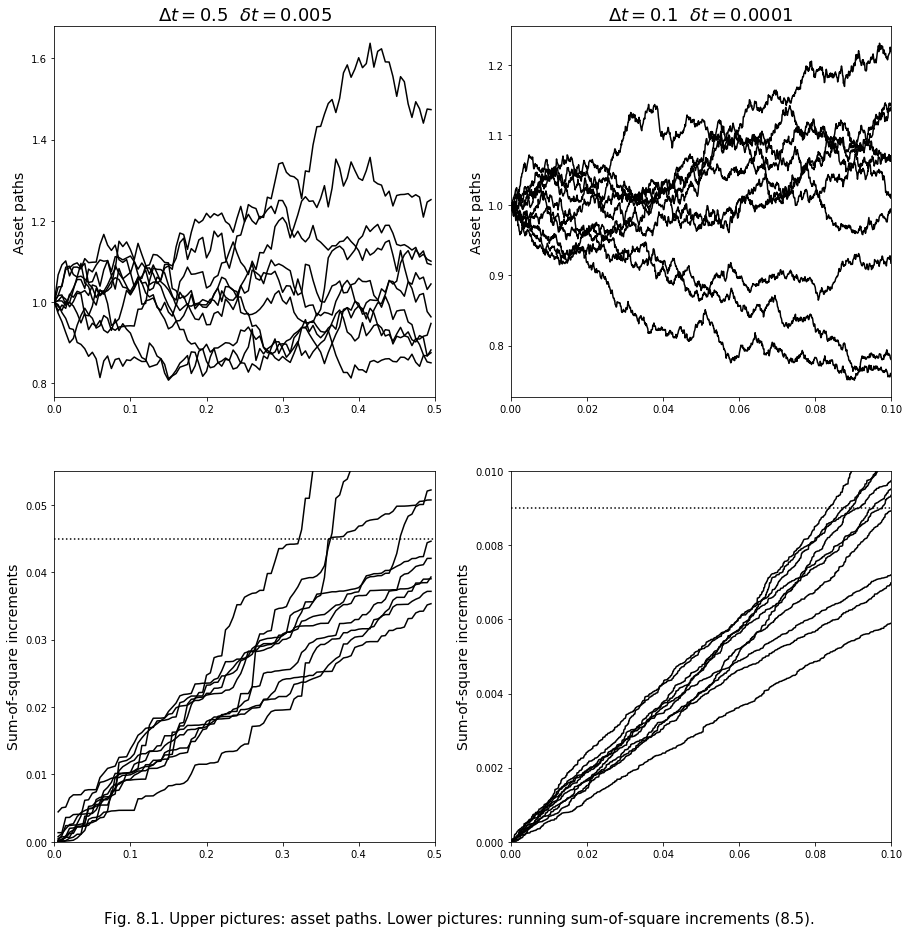

In [3]:
interval_end1=0.5; delta_t1=0.005;  sigma1=0.3
interval_end2=0.1; delta_t2=0.0001; sigma2=0.3
simulations=10
figsize=15
stock_price_data1=get_stock_prices(interval_end=interval_end1, sigma=sigma1, simulations=simulations, delta_t=delta_t1)
stock_price_data2=get_stock_prices(interval_end=interval_end2, sigma=sigma2, simulations=simulations, delta_t=delta_t2)
fig,axes=plt.subplots(nrows=2, ncols=2, figsize=(figsize,figsize))

axes[0][0].set_title(r'$\Delta t='+str(interval_end1)+'\ \ \delta t ='+str(delta_t1)+'$', fontsize=18)
axes[0][1].set_title(r'$\Delta t='+str(interval_end2)+'\ \ \delta t ='+str(delta_t2)+'$', fontsize=18)

axes[0][0].set_xlim([0,interval_end1])
axes[0][1].set_xlim([0,interval_end2])
axes[1][0].set_xlim([0,interval_end1])
axes[1][1].set_xlim([0,interval_end2])

axes[1][0].set_ylim([0,0.055])
axes[1][1].set_ylim([0,0.01])

axes[0][0].set_ylabel('Asset paths', fontsize=14)
axes[0][1].set_ylabel('Asset paths', fontsize=14)
axes[1][0].set_ylabel('Sum-of-square increments', fontsize=14)
axes[1][1].set_ylabel('Sum-of-square increments', fontsize=14)

for i in range(simulations):
    axes[0][0].plot([s*delta_t1 for s in list(range(0,(int)(interval_end1/delta_t1)))],
                    stock_price_data1[i], color='black', ls='-')
    axes[0][1].plot([s*delta_t2 for s in list(range(0,(int)(interval_end2/delta_t2)))],
                    stock_price_data2[i], color='black', ls='-')
    axes[1][0].plot([s*delta_t1 for s in list(range(0,(int)(interval_end1/delta_t1)))],
                    stock_price_data1[i].diff(periods=1).pow(2).cumsum(axis=0), color='black', ls='-')
    axes[1][1].plot([s*delta_t2 for s in list(range(0,(int)(interval_end2/delta_t2)))], 
                    stock_price_data2[i].diff(periods=1).pow(2).cumsum(axis=0), color='black', ls='-')
axes[1][0].axhline(y=sigma1**2*interval_end1, color='black', ls=':')
axes[1][1].axhline(y=sigma2**2*interval_end2, color='black', ls=':')
fig.text(.5, .05, 'Fig. 8.1. Upper pictures: asset paths. Lower pictures: running sum-of-square increments (8.5).',ha='center',
        fontsize=15)
plt.show()

<font size=4>
$$
\Pi(S,t)=A(S,t)S+D(S,t) \tag{8.6}
$$
    
$$
\delta \Pi_i = A_i\delta S_i+ rD_i\delta t \tag{8.7}
$$
    
$$
\delta V_i \approx \frac{\partial V_i}{\partial t}\delta t + \frac{\partial V_i}{\partial S}\delta S_i
+\frac{1}{2} \frac{\partial^2 V_i}{\partial S^2} \delta S_i^2 \tag{8.8}
$$
    
$$
\delta(V-\Pi)_i \approx \left(\frac{\partial V_i}{\partial t}-rD_i\right)\delta t + 
\left(\frac{\partial V_i}{\partial S}-A_i\right)\delta S_i
+ \frac{1}{2} \frac{\partial^2 V_i}{\partial S^2} \delta S_i^2 \tag{8.9}
$$


We can eliminate the unpredictable $\delta S_i$ term from $(8.9)$ by setting

$$
A_i=\frac{\partial V_i}{\partial S} \tag{8.10}
$$

in which case

$$
\delta(V-\Pi)_i \approx \left(\frac{\partial V_i}{\partial t}-rD_i\right)\delta t +
\frac{1}{2} \frac{\partial^2 V_i}{\partial S^2} \delta S_i^2 \tag{8.11}
$$

We may now sum $(8.11)$ to give

$$
\delta(V-\Pi) \approx \sum_{i=0}^{L-1}\left(\frac{\partial V_i}{\partial t}-rD_i\right)\delta t +
\frac{1}{2} \sum_{i=0}^{L-1} \frac{\partial^2 V_i}{\partial S^2} \delta S_i^2 \tag{8.12}
$$

On the basis that $V$ and $D$ are smooth functions, we write

$$
\delta(V-\Pi) \approx \left(\frac{\partial V}{\partial t}-rD\right)\Delta t +
\frac{1}{2} \frac{\partial^2 V}{\partial S^2} \sum_{i=0}^{L-1} \delta S_i^2 
$$

and using $(8.4)$ to approximate $\delta S_i^2$

$$
\delta(V-\Pi) \approx \left(\frac{\partial V}{\partial t}-rD +
\frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} \right)\Delta t \tag{8.13}
$$


The final leap of logic is to argue that because this change in the portfolio $V − \Pi$ is nonrandom, it must equal the corresponding growth offered by the risk-free interest rate, so

$$\Delta (V − \Pi) = r\Delta t(V − \Pi) \tag{8.14}$$

Now, combining $(8.6)$, $(8.13)$ and $(8.14)$ gives
$$
\frac{\partial V}{\partial t}-rD + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} = r (V-AS-D) 
$$

Using $A = \partial V/\partial S$ from $(8.10)$ and rearranging, we arrive at

$$
\frac{\partial V}{\partial t} +
\frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} +
rS\frac{\partial V}{\partial S} -
rV = 0 \tag{8.15}
$$

</font>